# Etape 1: Nettoyage et Exploration 

In [27]:
import pandas as pd

df= pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Etape 2: Visualisation des données

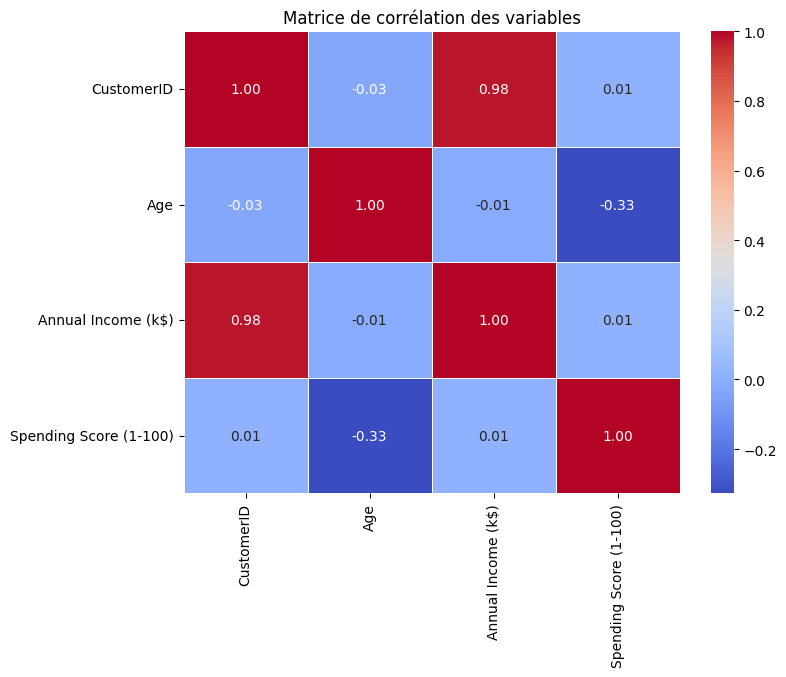

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation des variables')
plt.show()



#  Etape 3: Modélisation

In [33]:

# 1 - Prétraitement
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


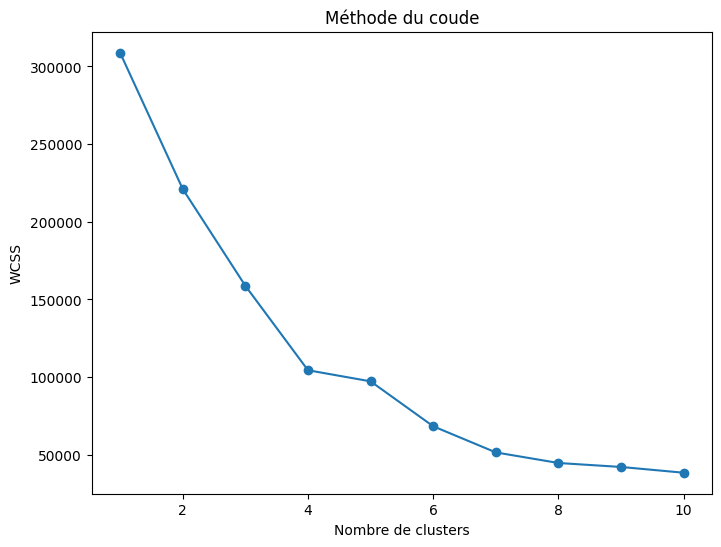

In [34]:
# 2 - Détermination du nombre optimal de clusters (méthode du coude)

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, 11), wcss, marker='o')
ax.set_title("Méthode du coude")
ax.set_xlabel("Nombre de clusters")
ax.set_ylabel("WCSS")
plt.show()


In [35]:
# 3 - Application du K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


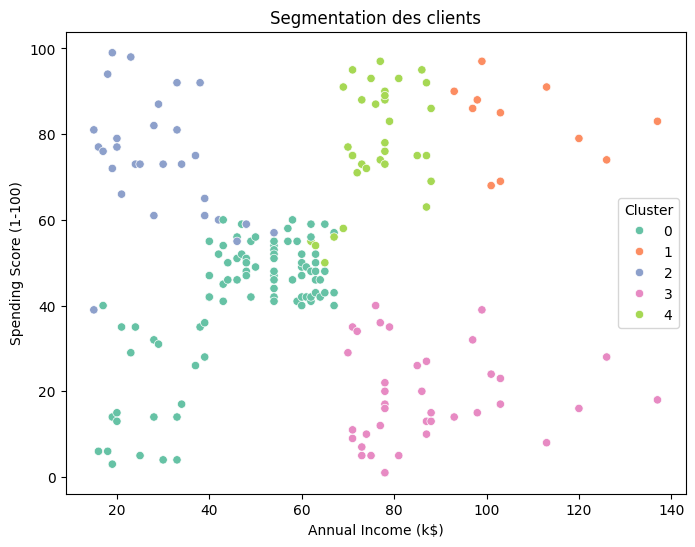

In [36]:

# 4 - Visualisation des clusters
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', ax=ax)
ax.set_title('Segmentation des clients')
plt.show()


In [37]:
import joblib


joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']